In [1]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import toolkit

In [2]:
%matplotlib inline

## What is RGB?? 

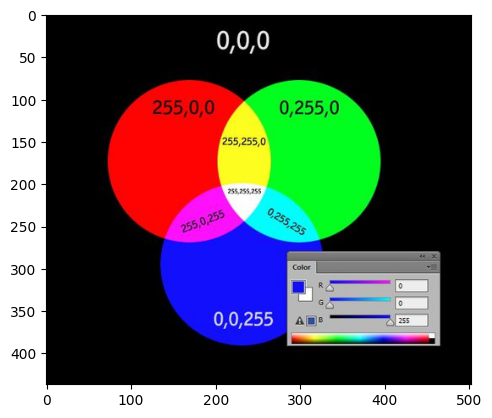

In [3]:
### display an image 
img = Image.open('images/RGB.jpg') 
plt.imshow(img)

### first, let's just display an image: 

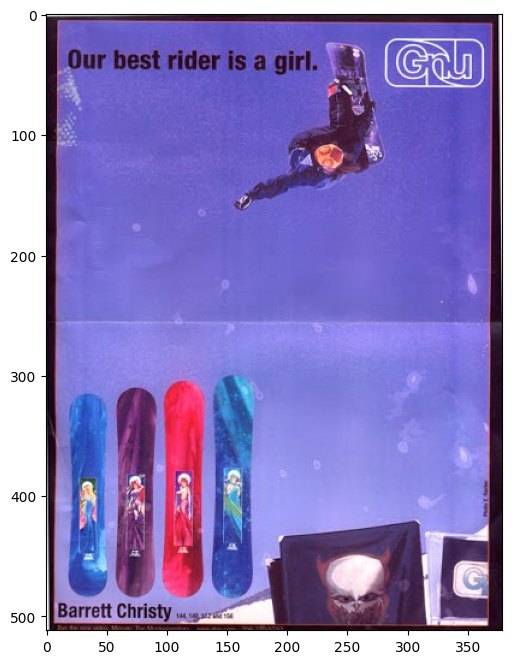

In [4]:
pic = imageio.imread('images/BChristy.jpg')
plt.figure(figsize = (8,8))

plt.imshow(pic)

### What the heck is RGB? 

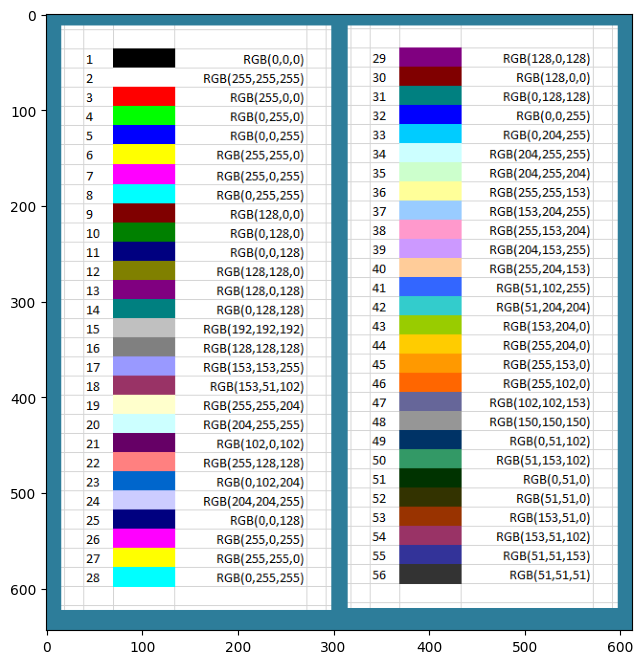

In [5]:
rpic = imageio.imread('images/RGB_colors.png')
plt.figure(figsize = (8,8))

plt.imshow(rpic)

### Now, you try to make a color: 

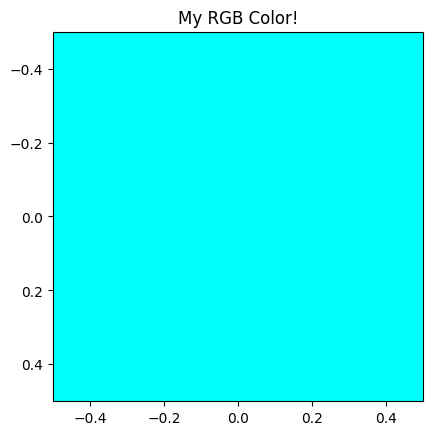

In [6]:
## define the intensity of each color below: 
## example: 
red = 0
blue = 255
green = 255

plt.title("My RGB Color!")
plt.imshow([[(red, green, blue)]])

## now, let's split our image into different channels: 
### what do you notice?? what is that red snowboard doing?

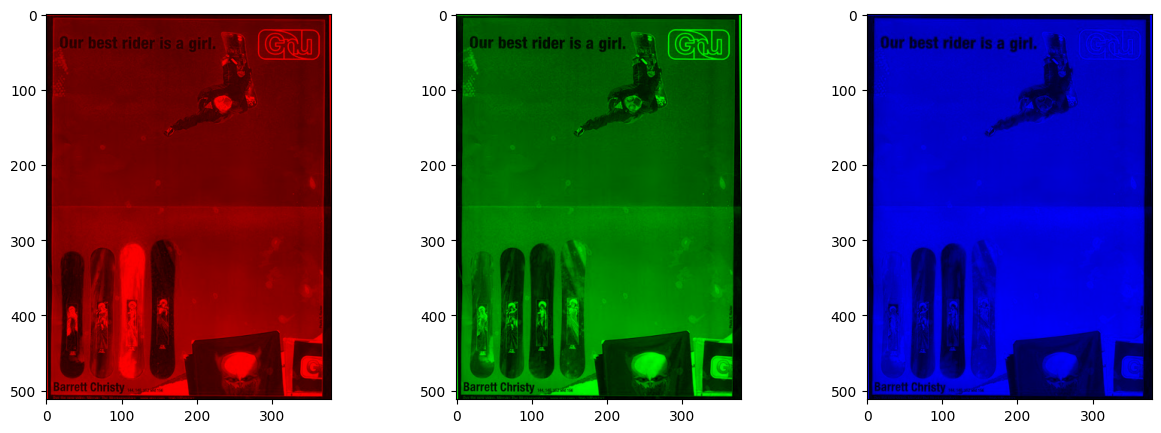

In [7]:
toolkit.rgb_split(pic)

## Now, a color histogram: 

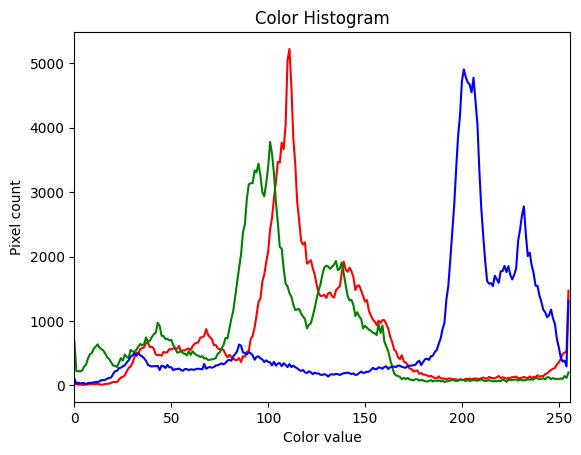

In [8]:
toolkit.color_histogram(pic)

### Okay, now you try upload a photo, then let's see what colors it is made of: 

In [9]:
#my_image = 'your_image_name_here.jpg'

In [10]:
#pic = imageio.imread(my_image)
#plt.figure(figsize = (15,15))

#plt.imshow(pic)

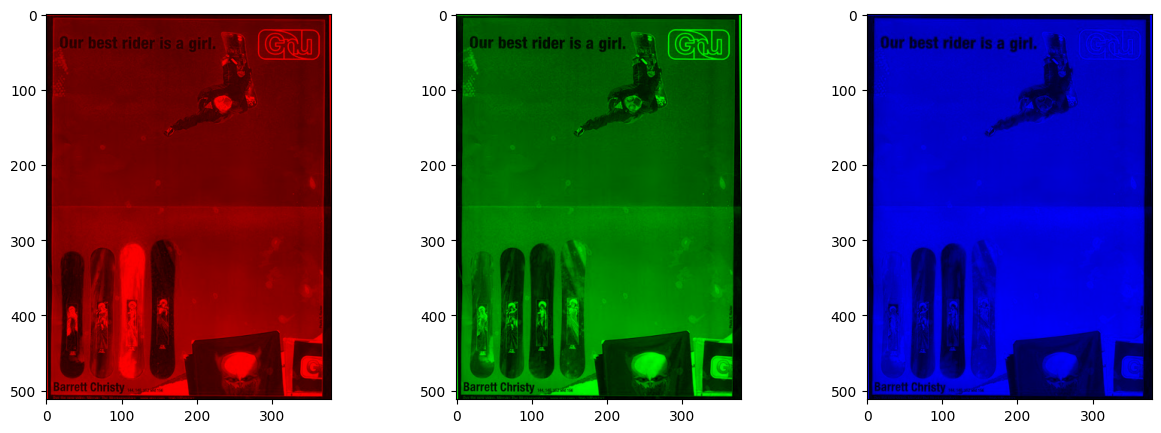

In [11]:
### RGB split images
toolkit.rgb_split(pic)

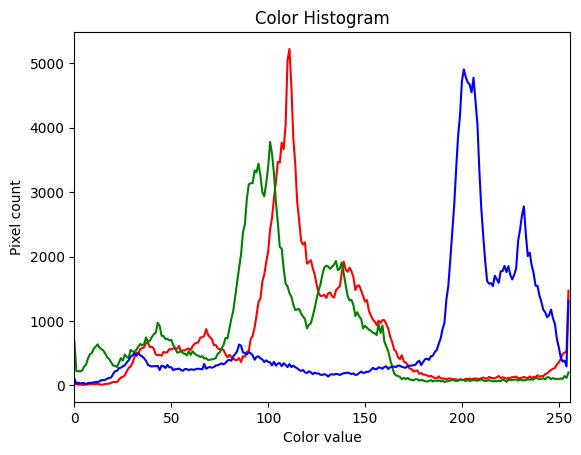

In [12]:
#### Color histogram
toolkit.color_histogram(pic)

### Why is this useful for environmental data proccessing? 

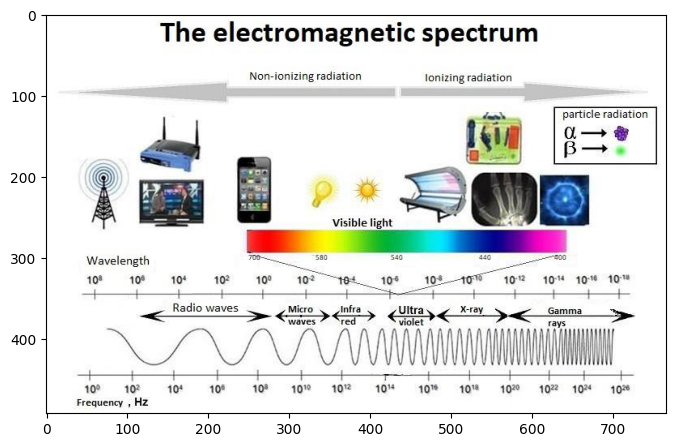

In [13]:
img = Image.open('images/EM_spectrum.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

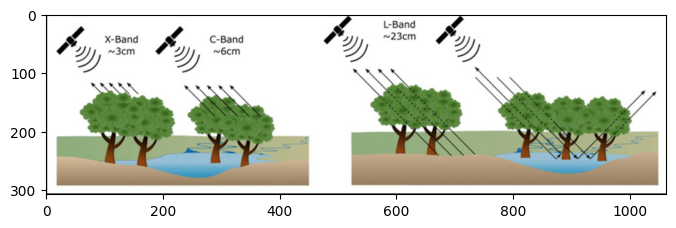

In [14]:
img = Image.open('images/radar_backscatter.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

## What is Albedo? why is it important?

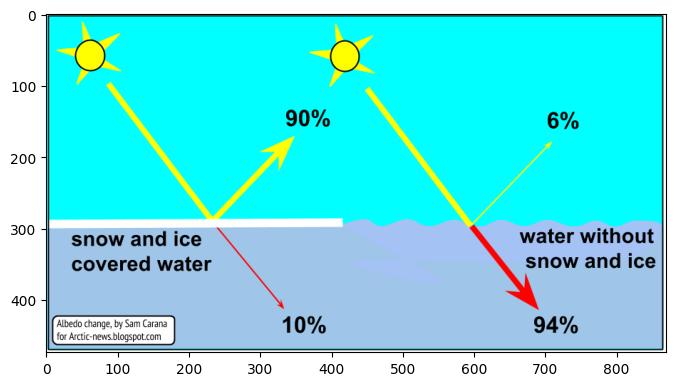

In [15]:
img = Image.open('images/albedo_diagram.png') 
plt.figure(figsize = (8,8))
plt.imshow(img)

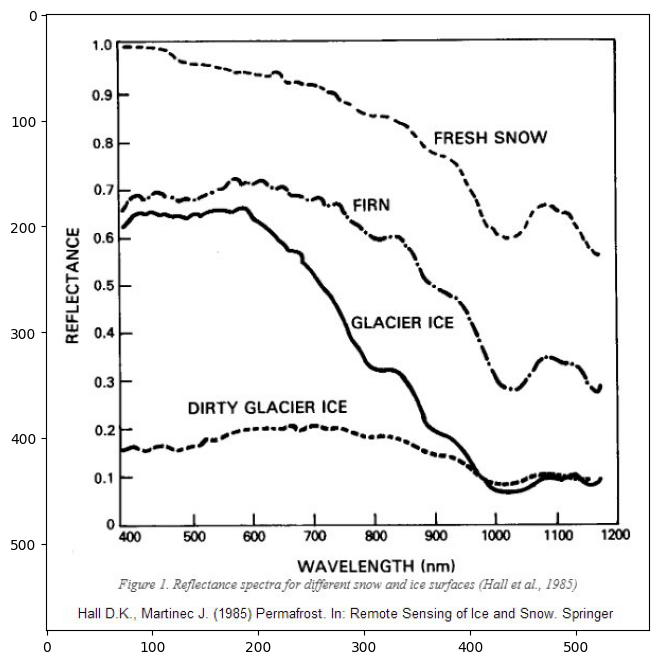

In [16]:
img = Image.open('images/reflectance.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

## Doesn't this ice look rather dusty? 

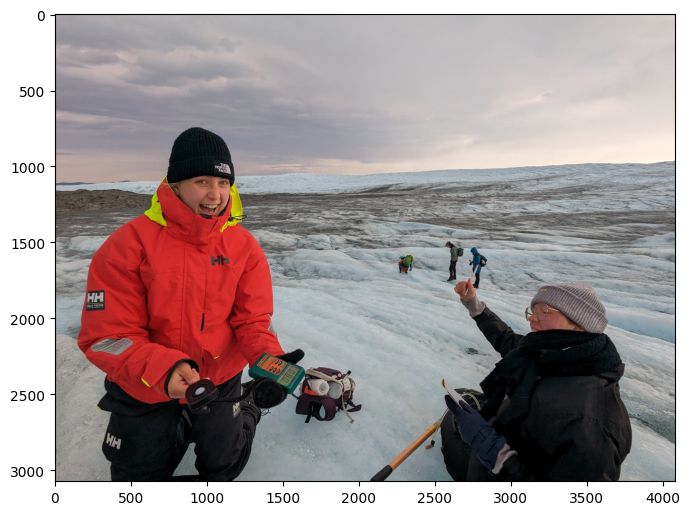

In [17]:
img = Image.open('images/radiometer.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

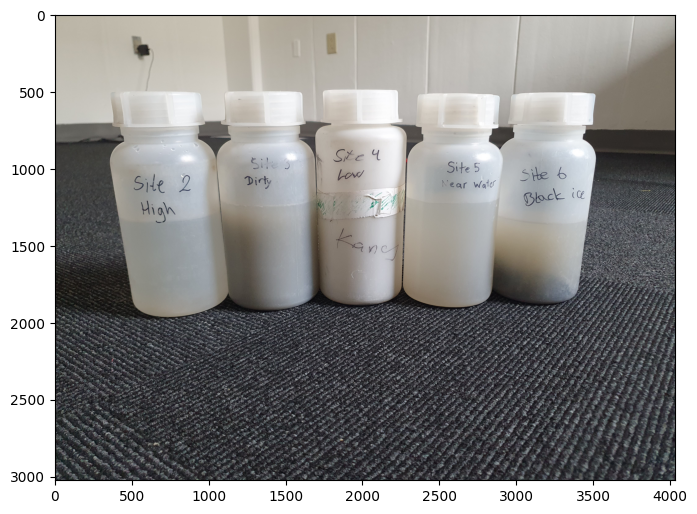

In [18]:
img = Image.open('images/samples.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)

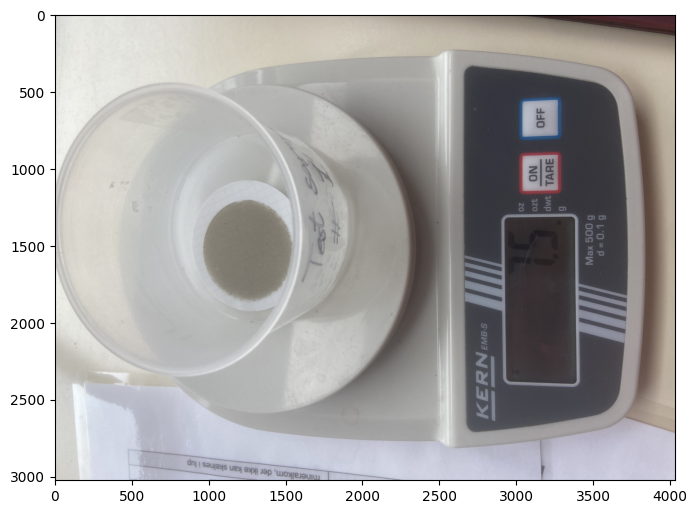

In [19]:
img = Image.open('images/scaled_dust.JPG') 
plt.figure(figsize = (8,8))
plt.imshow(img)

## Let's take a look at this data: 

https://docs.google.com/spreadsheets/d/1JB4fcoNF7VHK1kxeCf-BsnT3wdSEJnwIz2xW-6K4laI/edit?usp=sharing 

In [20]:
## give the files a name to work with
## the *  at end tells the computer that I want to see all the files in that folder! 
snow_pics1 = toolkit.list_files_local('snow_day1/*.jpg')
snow_pics2 = toolkit.list_files_local('snow_day2/*.jpg')

In [21]:
### print out all the file names 
snow_pics1

['snow_day1\\snow2.jpg',
 'snow_day1\\snow3.jpg',
 'snow_day1\\snow4.jpg',
 'snow_day1\\snow5.jpg',
 'snow_day1\\snow6.jpg']

### Example Image

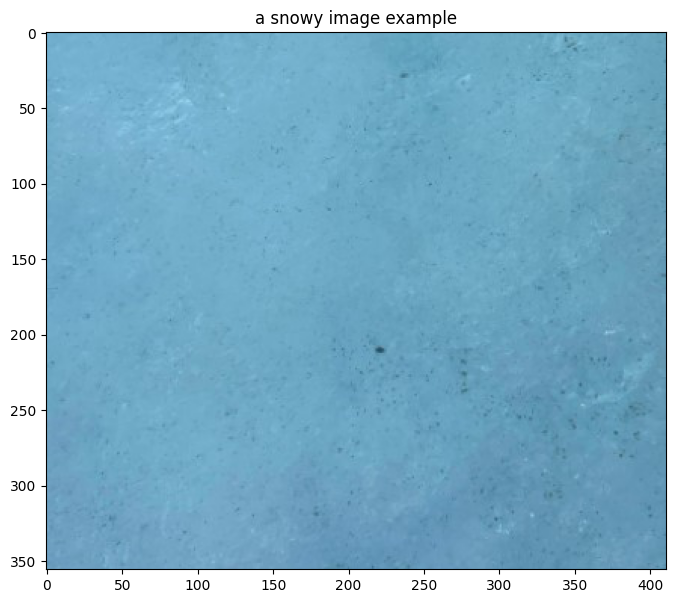

In [27]:
img = Image.open('snow_day1/snow2.jpg') 
plt.figure(figsize = (8,8))
plt.title("a snowy image example")
plt.imshow(img)

In [28]:
### go through and for each find the luminance: 
def lum_function(picture_list):
    blue_list = []
    lum_list = []
    for img in picture_list: 
        pic = imageio.imread(img)

        ### let's make arrays for R, G, and B: 
        RED = pic[ : , : , 0] /255
        BLUE = pic[ : , : , 1] /255
        GREEN = pic[ : , : , 2] /255

        LUMINANCE = (0.2126*RED + 0.7152*GREEN + 0.0722*BLUE)

        lum = np.asarray(LUMINANCE)
        blu = np.asarray(BLUE)
        L_value =np.sum(lum)
        blueness = np.sum(blu)

        lum_list.append(L_value / (pic.shape[0]*pic.shape[1]))
        blue_list.append(blueness/ (pic.shape[0]*pic.shape[1])) 
        
    return lum_list, blue_list

In [29]:
def plot_points(x, y, names, title, xlabel, ylabel, color): 

    names = np.array(list(names))


    fig,ax = plt.subplots()
    sc = plt.scatter(x, y, color = color)
    #sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

    annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                        bbox=dict(boxstyle="round", fc="w"),
                        arrowprops=dict(arrowstyle="->"))
    annot.set_visible(False)

    #text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                               #" ".join([names[n] for n in ind["ind"]]))

    def update_annot(ind):

        pos = sc.get_offsets()[ind["ind"][0]]
        annot.xy = pos
        text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                               " ".join([names[n] for n in ind["ind"]]))
        annot.set_text(text)
        annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
        annot.get_bbox_patch().set_alpha(0.4)


    def hover(event):
        vis = annot.get_visible()
        if event.inaxes == ax:
            cont, ind = sc.contains(event)
            if cont:
                update_annot(ind)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                if vis:
                    annot.set_visible(False)
                    fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", hover)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [30]:
## call our function: 
### day 1:
luminance_day1, blue_day1 = lum_function(snow_pics1)

### day 2:
luminance_day2, blue_day2 = lum_function(snow_pics2)

In [31]:
### albedo array: 
albedo_day1 = [ 0.27, 0.1, 0.22, 0.11, 0.06]
albedo_day2 = [0.28, 0.31, 0.25, 0.09, 0.11, 0.11, 0.09, 0.15]

In [32]:
### particle data array
particles_day1 = [9.7,23.4, 5.6, 5.9,465.2 ] 
particles_day2 = [ 0.2, 0.4, 0.4, 0.8, 19.0, 4.4, 274.1, 1.3]

In [45]:
#%matplotlib widget 
#%matplotlib notebook
%matplotlib inline

### plotting: 

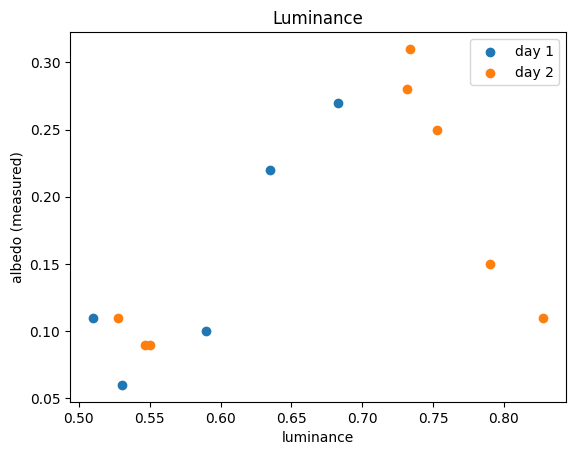

In [46]:
### let's plot our luminance: 
plt.scatter(luminance_day1, albedo_day1, label= 'day 1')
plt.scatter(luminance_day2, albedo_day2, label= 'day 2')
plt.title("Luminance")
plt.xlabel("luminance")
plt.ylabel("albedo (measured)")
plt.legend()

### plotting "blueness"

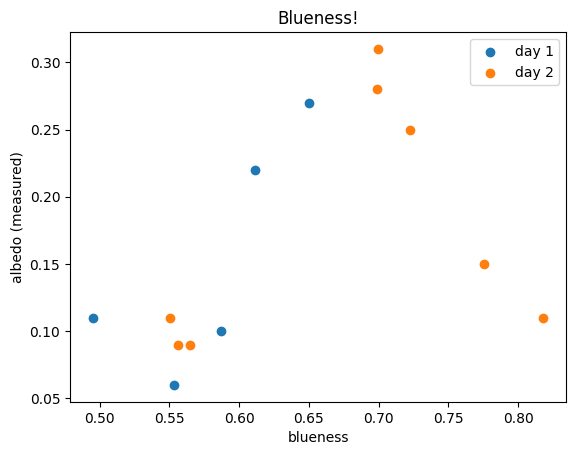

In [47]:
plt.scatter(blue_day1, albedo_day1, label= 'day 1')
plt.scatter(blue_day2, albedo_day2, label= 'day 2')
plt.title("Blueness!")
plt.xlabel("blueness")
plt.ylabel("albedo (measured)")
plt.legend()

### particle concentration

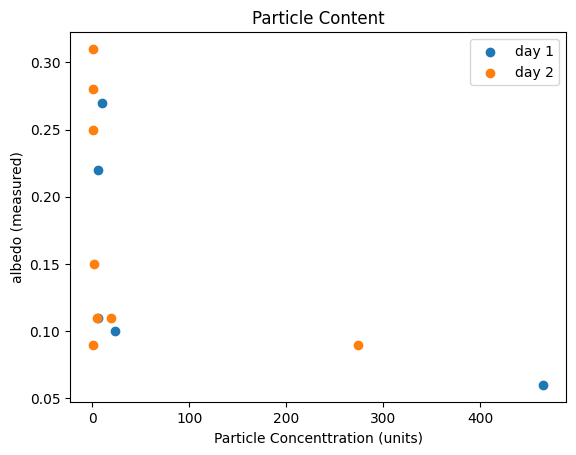

In [48]:
plt.scatter(particles_day1, albedo_day1, label= 'day 1')
plt.scatter(particles_day2, albedo_day2, label= 'day 2')
plt.title("Particle Content")
plt.xlabel("Particle Concenttration (units)")
plt.ylabel("albedo (measured)")
plt.legend()

### Analysis of Images: 

In [49]:
## okay so we need to put both points on plot so: 
luminance_both = list(luminance_day1) + list(luminance_day2)
blue_both = list(blue_day1) + list(blue_day2)
albedo_both = list(albedo_day1) + list(albedo_day2)
particles_both = list(particles_day1) + list(particles_day2)

file_names = list(snow_pics1) + list(snow_pics2)

In [60]:
def plot_annotations(x, y, title, xlabel, ylabel, filenames, color):
    ### let's plot our luminance: 
    fig, ax = plt.subplots()

    ax.scatter(x, y, color = color)

    ### add labels 
    for i, txt in enumerate(file_names):
        ax.annotate(txt, (x[i], y[i]), fontsize=6)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

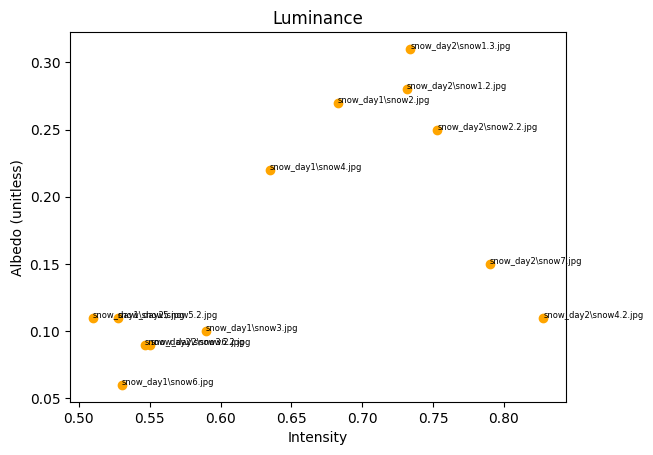

In [61]:
plot_annotations(luminance_both, albedo_both, "Luminance", "Intensity", "Albedo (unitless)", file_names, color= 'orange')

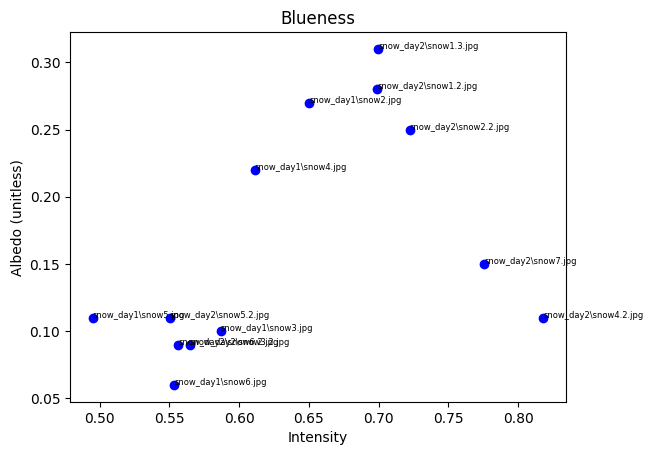

In [57]:
plot_annotations(blue_both, albedo_both, "Blueness", "Intensity", "Albedo (unitless)", file_names, color= 'blue')

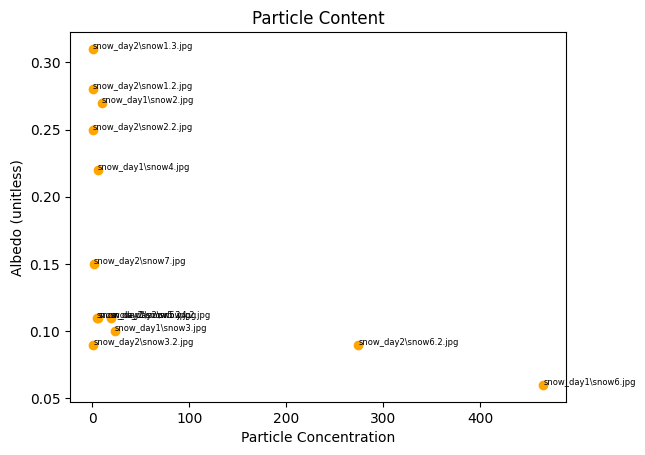

In [58]:
plot_annotations(particles_both, albedo_both, "Particle Content", "Particle Concentration", "Albedo (unitless)", file_names, color= 'orange')

### How does blueness/luminance compare?

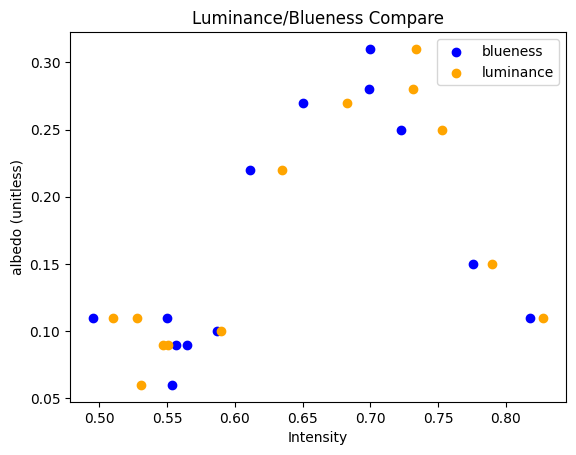

In [59]:
plt.scatter(blue_both, albedo_both, label= 'blueness', color = 'blue')
plt.scatter(luminance_both, albedo_both, label= 'luminance', color='orange')
plt.title("Luminance/Blueness Compare")
plt.xlabel("Intensity")
plt.ylabel("albedo (unitless)")
plt.legend()

# CHALLENGE/ INVESTIGATE: 
I want you to show the image of one of these points, the file name popping up from hovering over the point in jupyter notebook, does the point match the data?

In [59]:
### YOUR CODE HERE TO PRINT IMAGE! 

### Example: 

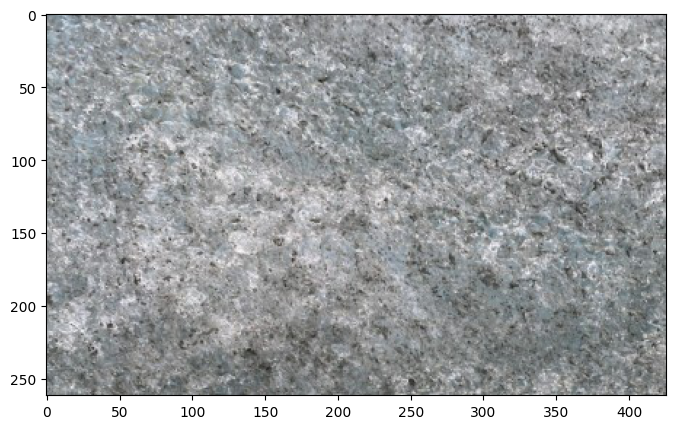

In [60]:
img = Image.open('snow_day1/snow3.jpg') 
plt.figure(figsize = (8,8))
plt.imshow(img)